In [34]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### Declaração de variáveis


In [35]:
num_cobaias = 9
num_pics = 10
input_img = Image.open("database/p6_resized/p6_reconhecimento3.jpeg").convert('L')


### Conversão das imagens para formação de uma base


In [36]:
base = [Image.open(f'database/p{i}_resized/p{i}_{j}.jpeg').convert('L') for i in range(1, num_cobaias+1) for j in range(1, num_pics+1)]
size = len(base)
X = np.array([base[i].getdata() for i in range(size)])
len(X[0])

10800

### Centrar os dados na média


In [37]:
media = np.mean(X, 0)
phi = X-media

### Cara média


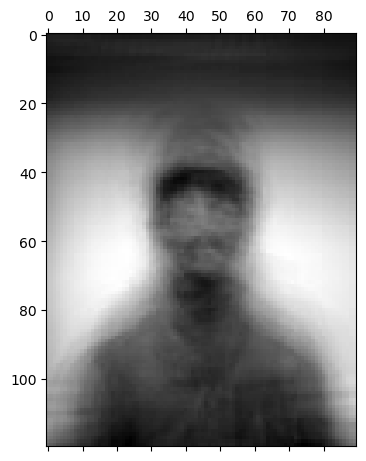

In [38]:
display(plt.matshow(np.reshape(media, (120, 90)), cmap='gray'))

### Aplicar SVD


In [39]:
e_faces, sigma, v = np.linalg.svd(phi.transpose(), full_matrices=False)
val_prop = sigma*sigma
traco = sum(val_prop)

### Observação dos valores próprios


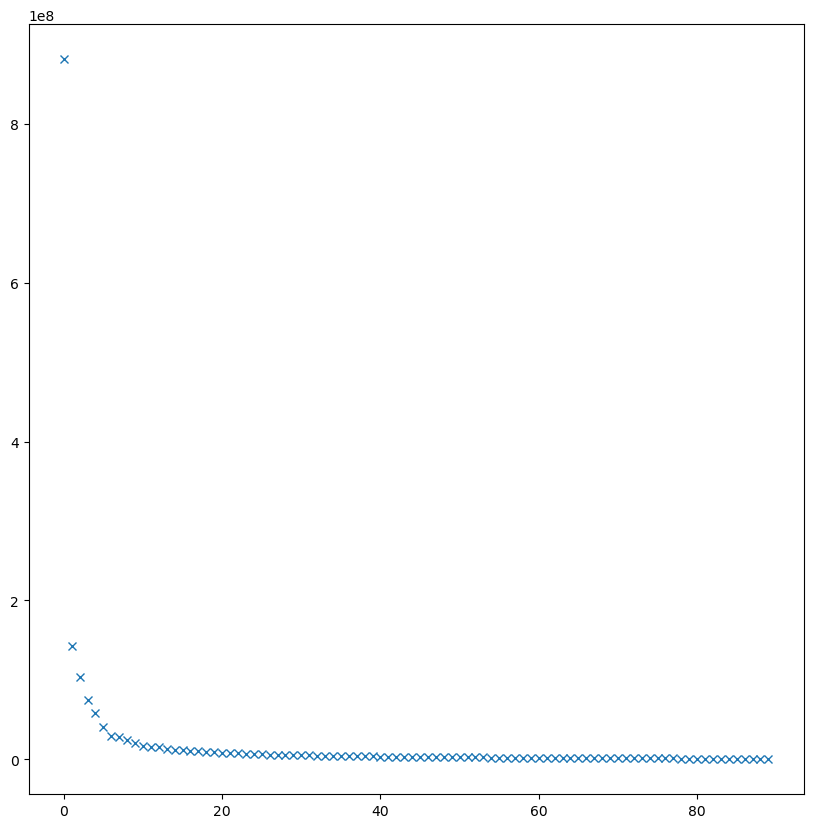

In [40]:
plt.figure(figsize=(10,10))
t = np.arange(0, size, 1)
plt.plot(t, val_prop, 'x')
plt.show()

### Selecionar o valor de K pretendido


In [42]:
k = 0
accuracy = 0
accuracy_wanted = 0.95
while accuracy < accuracy_wanted:
    accuracy = accuracy+val_prop[k]/traco
    k+=1
k, accuracy

(40, 0.9514470605980603)

### Calcular as projeções


In [43]:
coef_proj = [np.dot(phi[i], e_faces) for i in range(size)]

### Prediction


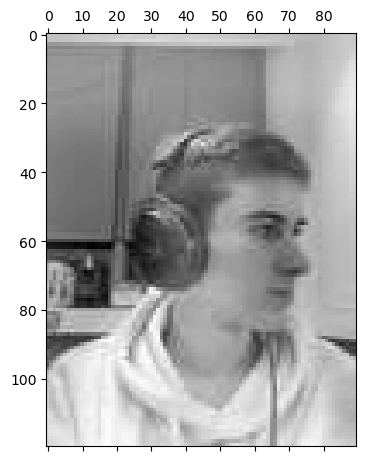

In [44]:
gamma = np.array(input_img.getdata())
test_phi = gamma - media
display(plt.matshow(np.reshape(test_phi, (120,90)), cmap='gray'))

In [45]:
test_coef_proj = np.dot(test_phi, e_faces)
dist = [np.linalg.norm(coef_proj[i] - test_coef_proj) for i in range(size)]
d_min = np.min(dist)

In [48]:
if d_min < 7000:
    pasta = np.floor(np.argmin(dist)/10)+1
    print(f'Pasta p{pasta}\ndist={d_min}')
else:
    print('Não sei quem é esse drogado')

Pasta p2.0
dist=4019.8528313631746


### Representação dos dados em 2D


In [25]:
def identify(img):
    gamma = np.array(img.getdata())
    test_phi = gamma - media
    test_coef_proj = np.dot(test_phi, e_faces[:,0:2])
    return test_coef_proj

Text(0, 0.5, 'Eigenface 2')

/usr/lib/python3.11/site-packages/matplotlib/text.py:757: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  posx = float(self.convert_xunits(self._x))
/usr/lib/python3.11/site-packages/matplotlib/text.py:758: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  posy = float(self.convert_yunits(self._y))
/usr/lib/python3.11/site-packages/matplotlib/text.py:897: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = float(self.convert_xunits(self._x))
/usr/lib/python3.11/site-packag

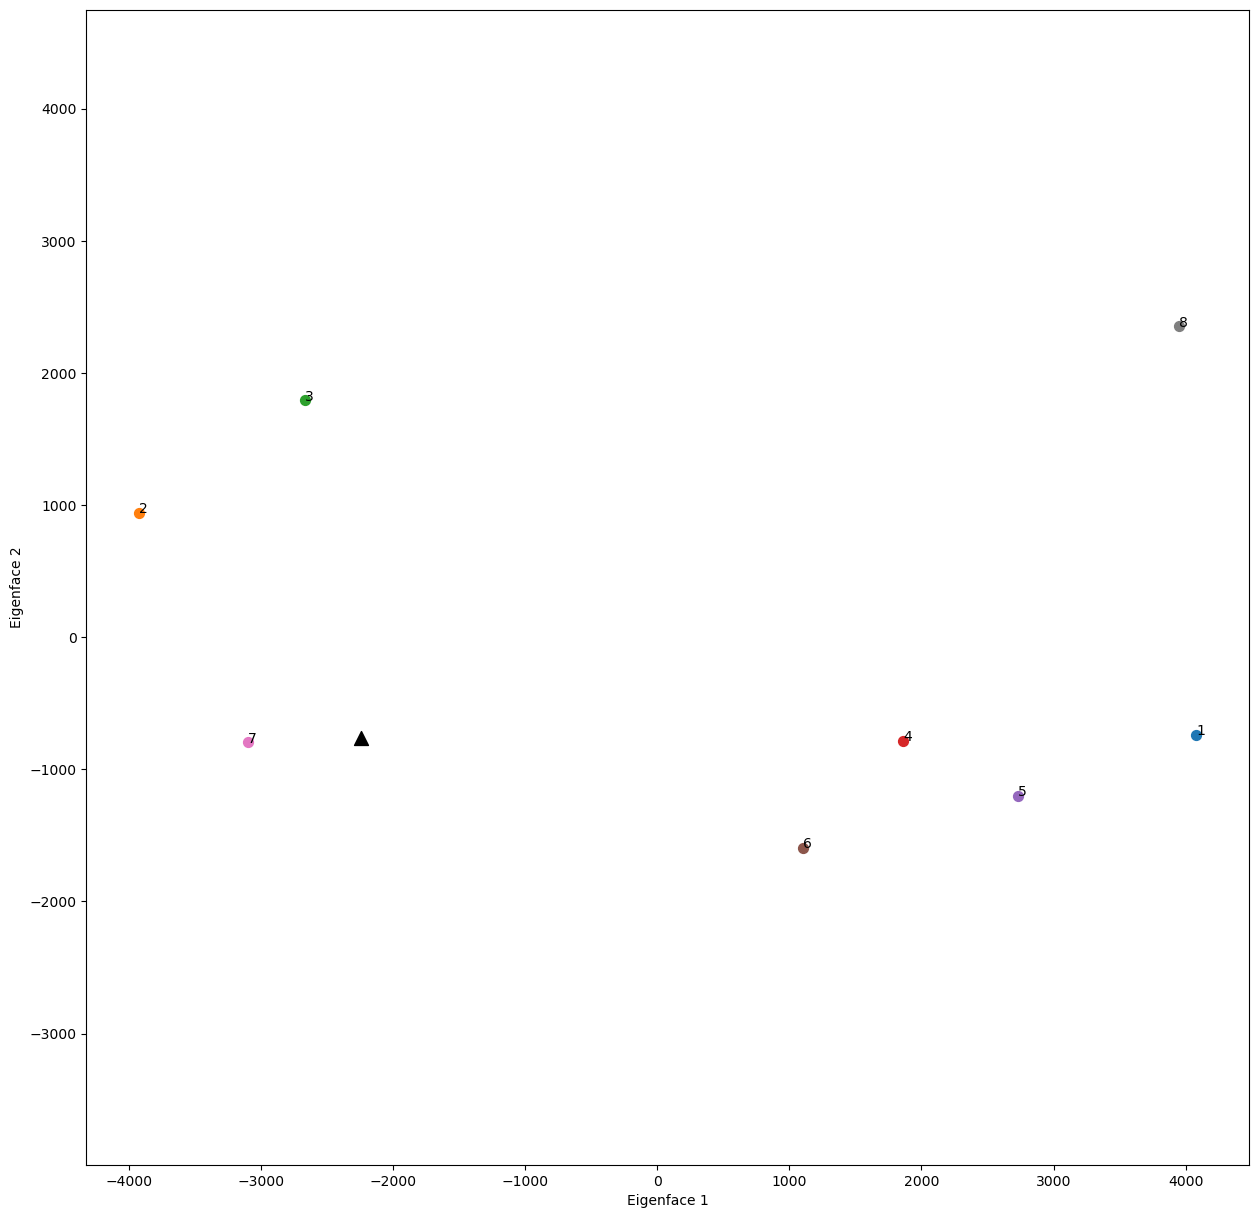

In [49]:
plt.figure(figsize=(15,15))
plt.axis('equal')
for pasta in range(1,num_cobaias):
    imagens = [Image.open(f'database/p{pasta}_resized/p{pasta}_{i}.jpeg').convert('L') for i in range(5,6)]
    x, y = np.array([identify(pic) for pic in imagens]).T
    plt.scatter(x,y, s=50)
    plt.text(x, y, pasta)
plt.scatter(*identify(input_img), label='Input image', marker='^', c='k', s=100)
plt.xlabel('Eigenface 1')
plt.ylabel('Eigenface 2')